# What factors made people more likely to survive on the Titanic?

In [26]:
#Basic import statements
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
#Import the titanic dataset, print length of dataframe, and the numbers of survivors
df = pd.read_csv('titanic-data.csv')
print "There are %i rows in the dataframe." % len(df)
print "In this sample, %i people survived while %i people perished." % (len(df[df['Survived'] == 1]),len(df[df['Survived'] == 0]) )

There are 891 rows in the dataframe.
In this sample, 342 people survived while 549 people perished.


In [21]:
#Output the top 20 rows of the dataframe for examination
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Show the data types for all columns in the dataframe
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### After a quick examination of the dataframe it appears that Cabin contains many null values and will not be used in the analysis. In addition, PassengerId is just a unique identifier with no predictive ability. The Name and Ticket features would also appear to be unique identifiers; however, there could be features extracted with one of those options being explored later in the analysis.
### For the purpose of this analysis, Pclass, Sex, Sibsp, Parch, and Embarked will be considered classification features while Age and Fare are continuous ratio values. Sibsp and Parch will also be correlated as discrete ratio values in addition to their classification exploration.
### Note: The correlations and charts featured below remove Null values during operation. Any explicit removal of null values will be noted as a comment in the code box.

In [42]:
#Show basic dataframe statistics
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### The following is shown from the above statistics:
1. At least 75% of the sample were in 2nd or 3rd class.
2. At least 75% of the sample with age data were below ~40 years old with an average of ~30. In addition, 177 instances in the sample had an age missing.
3. At least 75% of the sample had one or less sibling/spouse with them.
4. At least 75% of the sample had no parent or child with them.
5. At least 75% of the sample paid 31 or less for their fare with an average of 32.

## Are woman and children really first?
The first features we will be exploring are Sex and Age.
## Correlation Between Sex and Survival
First we'll get an idea of the absolute numbers in the sample.

There were 577 males and 314 females in the sample set.


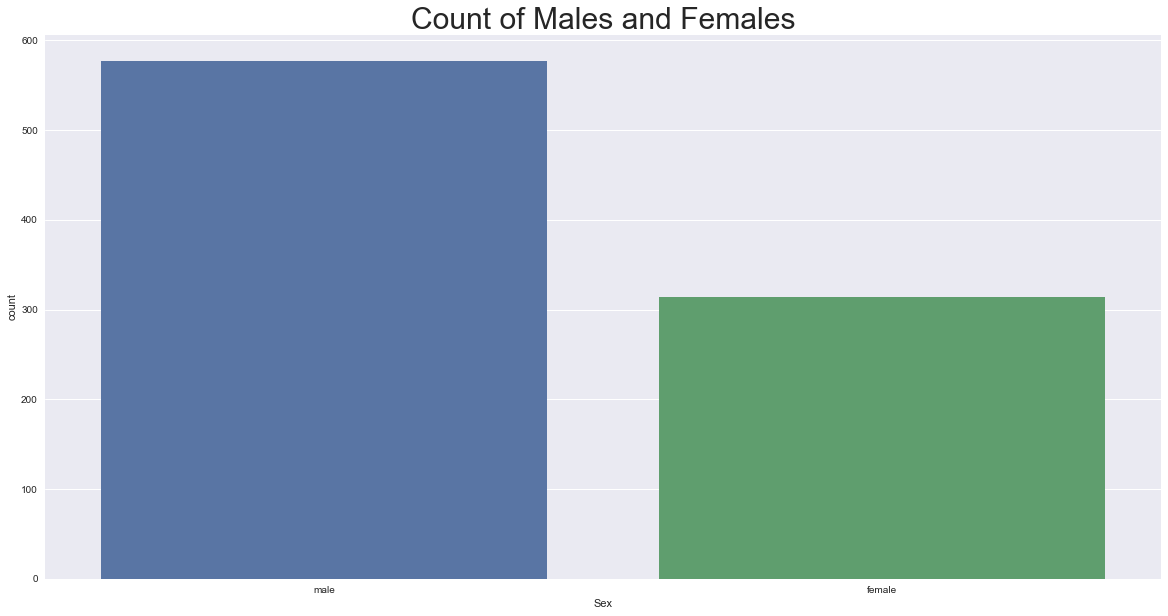

In [142]:
#Adjust plot size and create a countplot
print "There were %i males and %i females in the sample set." % (len(df[df['Sex'] == 'male']), len(df[df['Sex'] == 'female']))
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x="Sex", data=df).set_title("Count of Males and Females", fontsize=30);

### We can see that there are almost twice as many males as females in the sample.

In [123]:
#A new dataframe is created with the Survived column and dummie columns for Sex.
#Note: Pandas corr function uses Pearson correlation by default and correlates all columns with each other
#We're only printing out the first column of the correlation dataframe
pd.concat([df['Survived'], pd.get_dummies(df['Sex']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
female,0.543351
male,-0.543351


### Above we can see a moderate to high positive correlation between females and survival with a moderate to high negative correlation with males.
### We are using point plots for the categorical features as it shows the survival mean along with a bar for the 95% confidence interval.

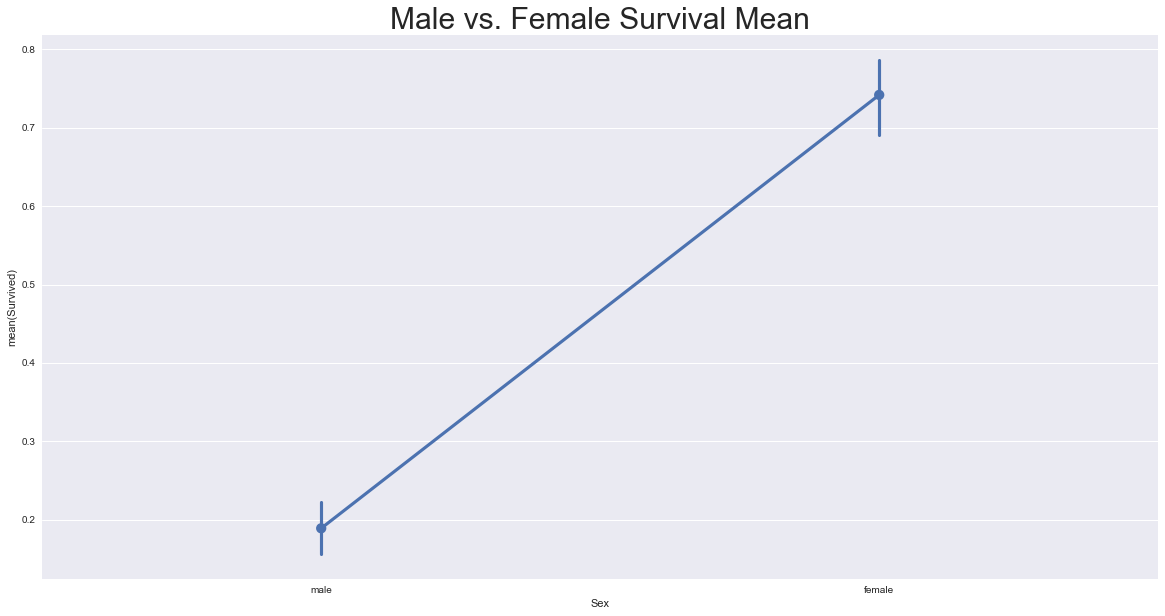

In [91]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Sex", y="Survived", data=df).set_title('Male vs. Female Survival Mean', fontsize=30);

### The chart above shows an obvious difference in the mean between females and males surviving the Titanic with females having about a .75 mean survival as opposed to the males which are around .19.
## Correlation Between Age and Survival

In [124]:
#Calculate the correlation between Age and Survival
df[['Survived', 'Age']].corr()[['Survived']]

,Survived
Survived,1.000000
Age,-0.077221


### Age and Survival show a very low correlation.

### The plots below show the distribution by age for both survivors and non-survivors. 

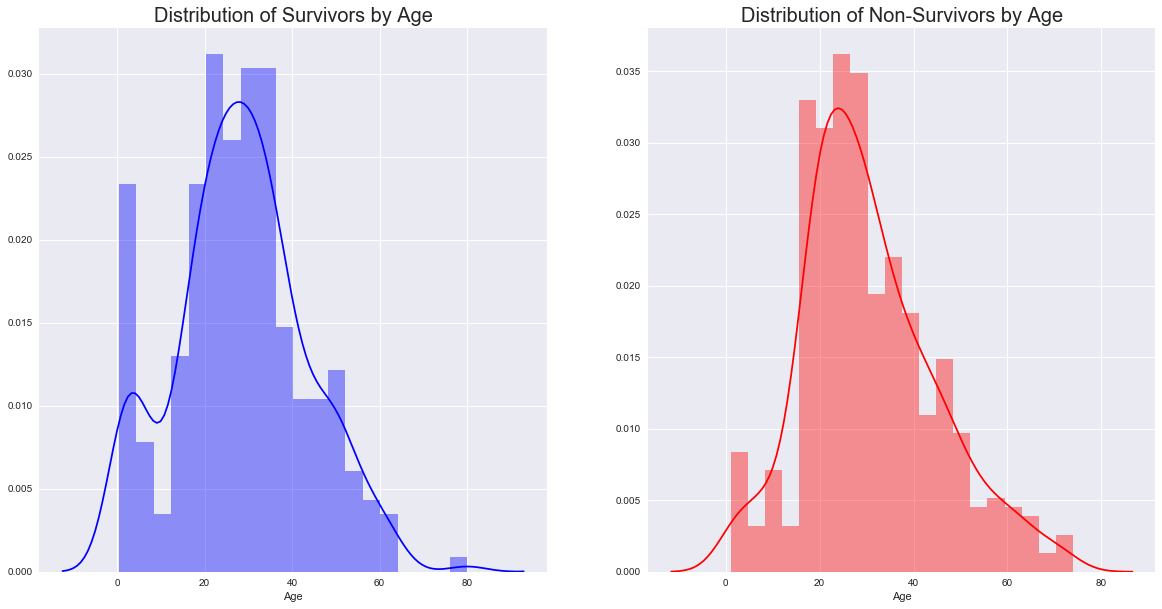

In [135]:
fig, ax =plt.subplots(1,2, figsize=(20, 10))
#Plot histograms along with an estimated distribution based on Survived and Age that is not null.
sns.distplot(df[(df['Survived'] == 1) & (df['Age'].notnull())]['Age'], bins=20, color="b", ax=ax[0]).set_title('Distribution of Survivors by Age', fontsize=20);
sns.distplot(df[(df['Survived'] == 0) & (df['Age'].notnull())]['Age'], bins=20, color="r", ax=ax[1]).set_title('Distribution of Non-Survivors by Age', fontsize=20);

### It appears that overall, the distributions for age of survivors and non-survivors are similar, there is a spike of children under 10 on the survivors chart.

## Correlation between Embarkation Ports and Survival
### According to Kaggle's data dictionary these are: C = Cherbourg, Q = Queenstown, S = Southampton

Count of Embarkation Ports: Southampton: 644; Cherbourg: 168; Queenstown: 77.


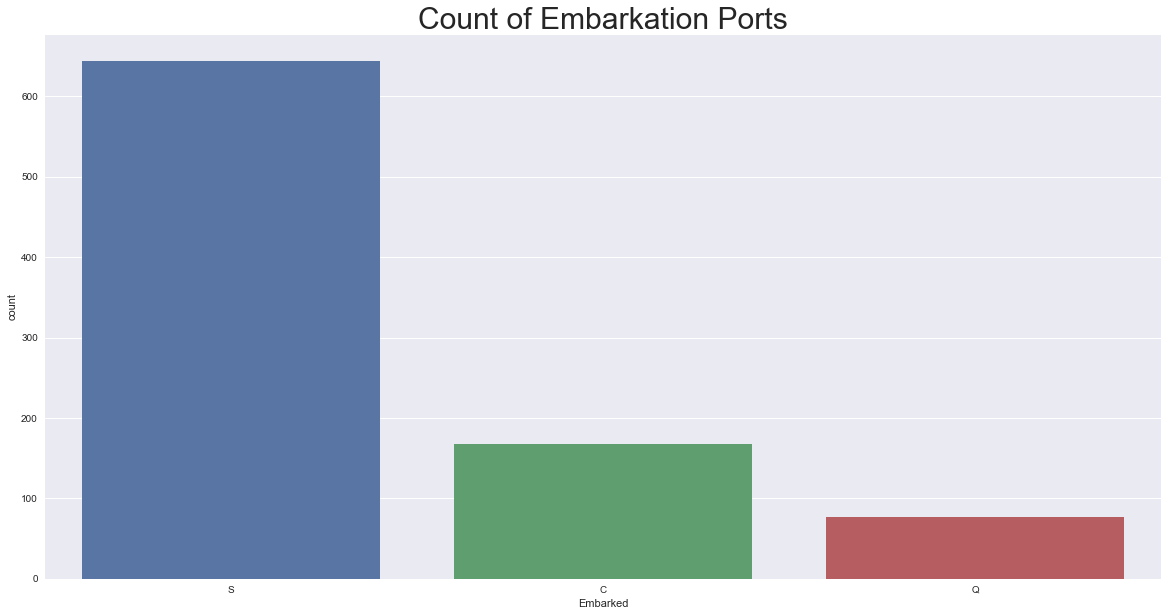

In [145]:
print "Count of Embarkation Ports: Southampton: %i; Cherbourg: %i; Queenstown: %i." % (len(df[df['Embarked'] == 'S']), len(df[df['Embarked'] == 'C']), len(df[df['Embarked'] == 'Q']))
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x="Embarked", data=df).set_title("Count of Embarkation Ports", fontsize=30);

### By far, most people's embarkation port was Southampton.

In [125]:
#A new dataframe is created with the Survived series and dummie columns for Embarked
pd.concat([df['Survived'], pd.get_dummies(df['Embarked']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.00000
C,0.16824
Q,0.00365
S,-0.15566


### Cherbourg appears to have a slight positive correlation with survival and Southampton has a slight negative correlation, but overall it doesn't appear that the embarkation point is correlated with survival.

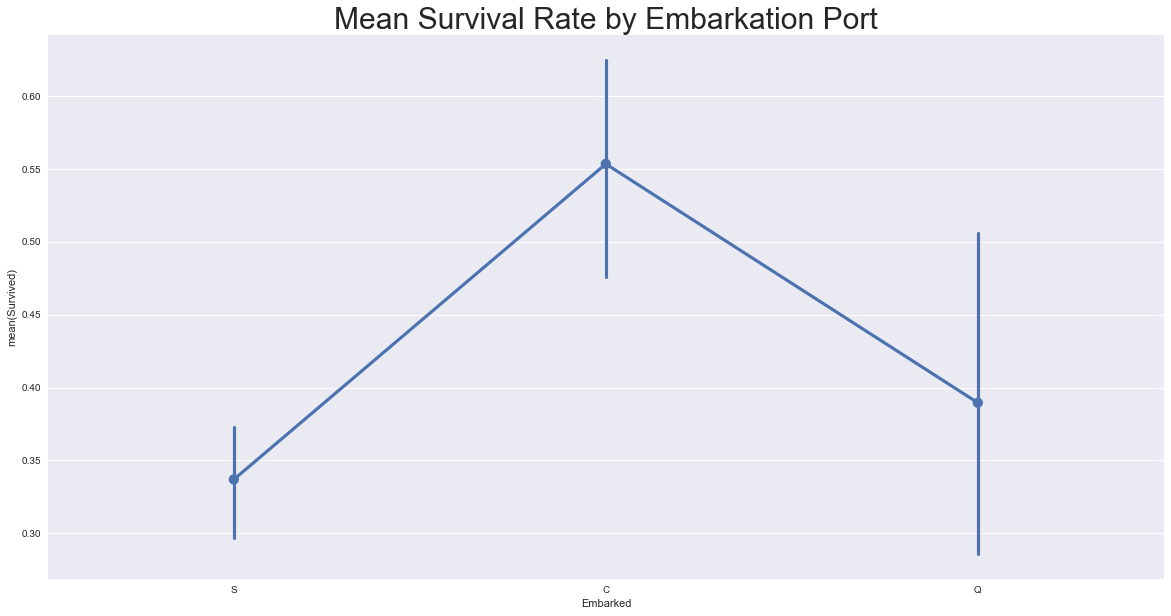

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Embarked", y="Survived", data=df).set_title("Mean Survival Rate by Embarkation Port", fontsize=30);

### While Cherbourg appears to have a higher average survival rate, the confidence intervals are wide and overlap other values leaving a lot of uncertainty to the predictive power of this feature.

### Since Sex appears to be highly correlated with survival, we'll began to add that as another category in the charts.

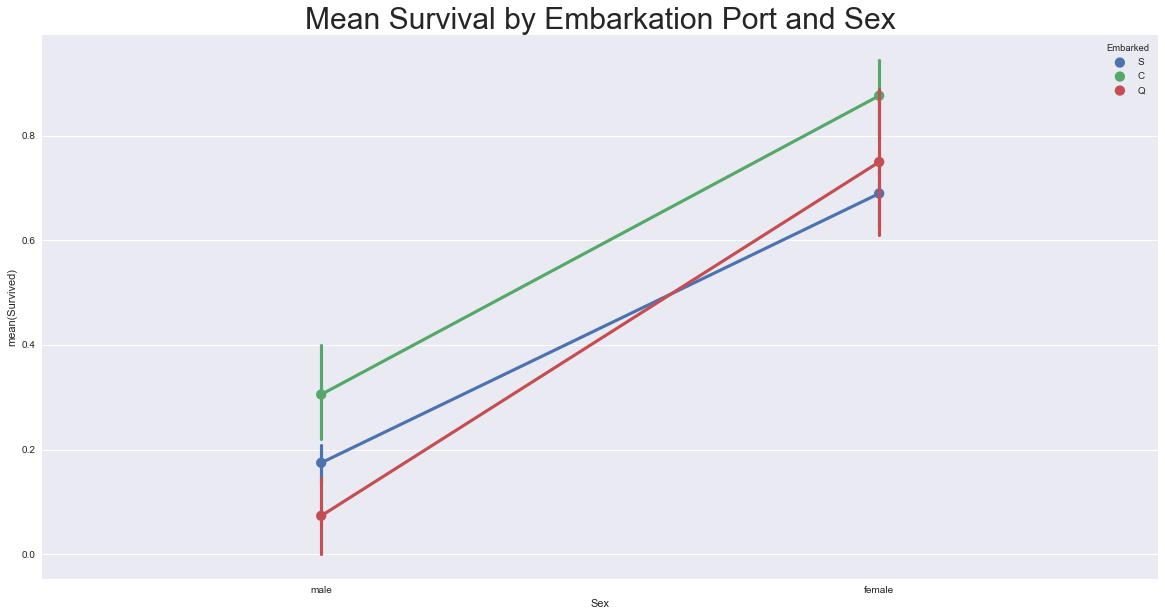

In [151]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Sex", y="Survived", hue="Embarked", data=df).set_title("Mean Survival by Embarkation Port and Sex", fontsize=30);

###
## Correlation Between Passenger Classes and Survival

Count of Passenger Classes: First: 216; Second: 184; Third: 491.


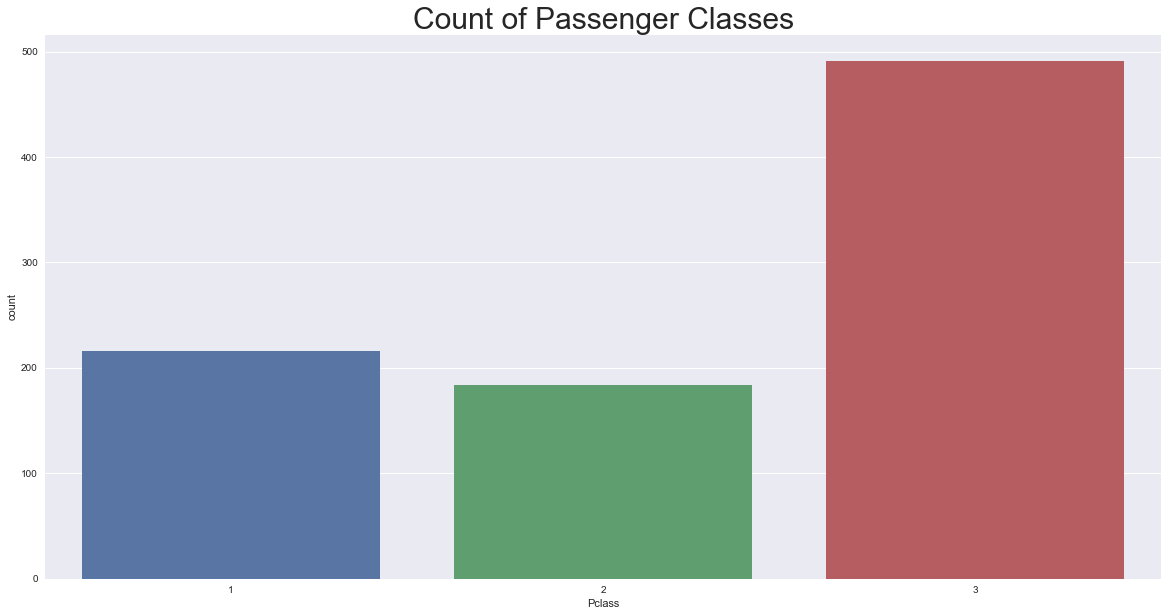

In [146]:
print "Count of Passenger Classes: First: %i; Second: %i; Third: %i." % (len(df[df['Pclass'] == 1]), len(df[df['Pclass'] == 2]), len(df[df['Pclass'] == 3]))
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x="Pclass", data=df).set_title("Count of Passenger Classes", fontsize=30);

In [136]:
#A new dataframe is created with the Survived series and dummie columns for Passenger Classes
pd.concat([df['Survived'], pd.get_dummies(df['Pclass']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
1,0.285904
2,0.093349
3,-0.322308


### There's a moderate positive correlation between survival and first class with a moderate negative correlation between survival and third class.

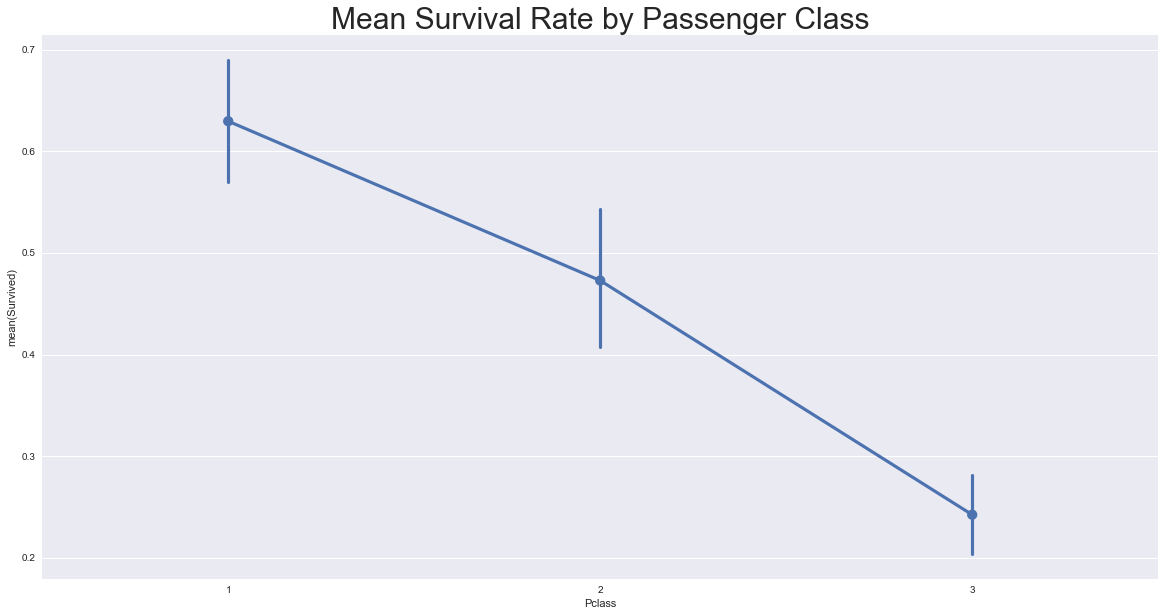

In [149]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Pclass", y="Survived", data=df).set_title("Mean Survival Rate by Passenger Class", fontsize=30);

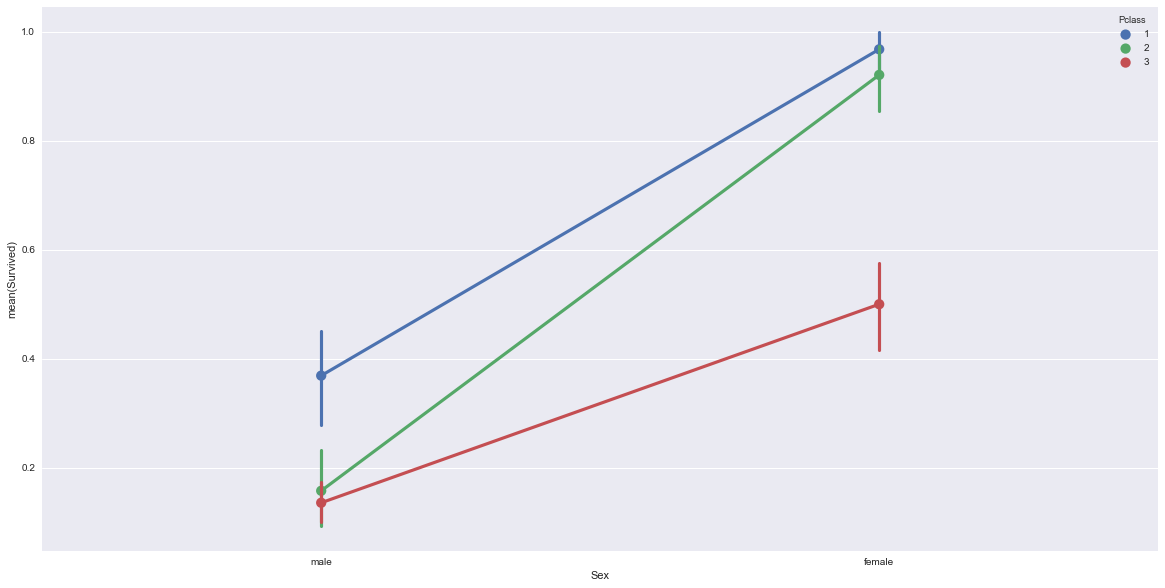

In [148]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=df);

## Correlation Between Number of Siblings/Spouses and Survival

In [127]:
#A new dataframe is created with the Survived series and dummie columns for Sex
pd.concat([df['Survived'], pd.get_dummies(df['SibSp']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
0,-0.115867
1,0.173076
2,0.029796
3,-0.037215
4,-0.064123
5,-0.059292
8,-0.070234


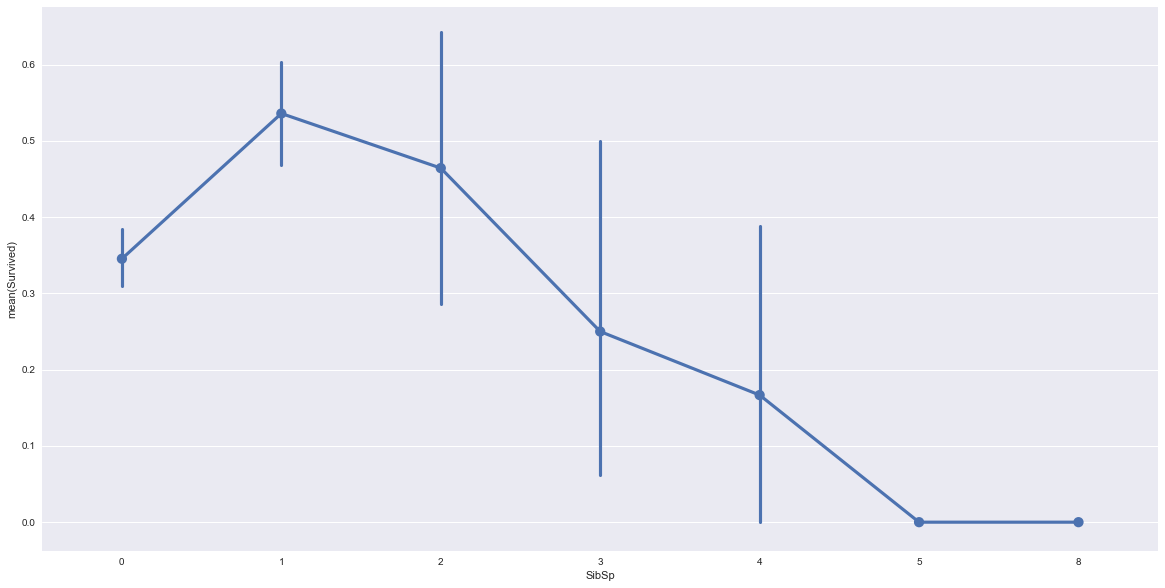

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="SibSp", y="Survived", data=df);

In [128]:
#Calculate the correlation between Age and Survival
df[['Survived', 'SibSp']].corr()[['Survived']]

,Survived
Survived,1.000000
SibSp,-0.035322


## Correlation Between Number of Parents/Children and Survival

In [129]:
#A new dataframe is created with the Survived series and dummie columns for Sex
pd.concat([df['Survived'], pd.get_dummies(df['Parch']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
0,-0.147408
1,0.134174
2,0.075020
3,0.033391
4,-0.053002
5,-0.028398
6,-0.026456


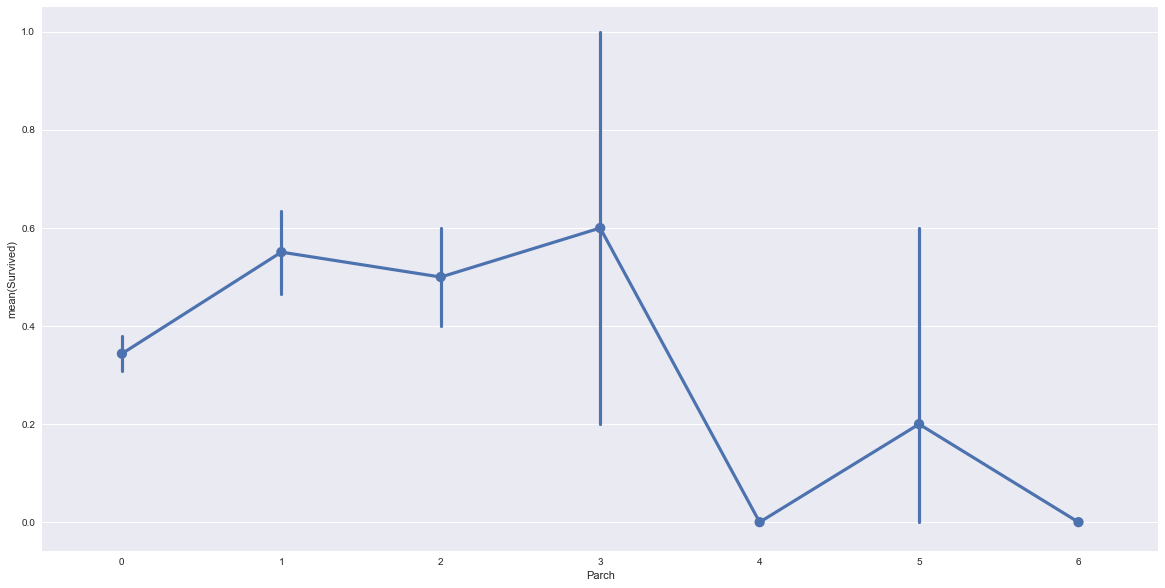

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Parch", y="Survived", data=df);

## Correlation Fare and Survival

In [130]:
#Calculate the correlations
df[['Survived', 'Fare']].corr()[['Survived']]

,Survived
Survived,1.000000
Fare,0.257307


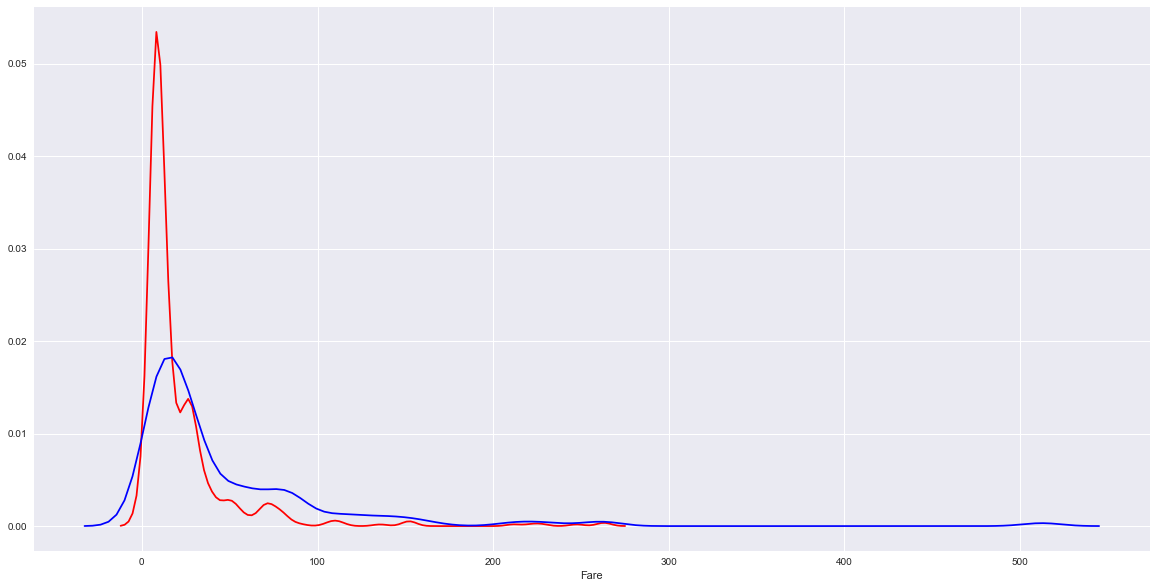

In [74]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(df[(df['Survived'] == 0) & (df['Fare'].notnull())]['Fare'], hist=False, color="r");
sns.distplot(df[(df['Survived'] == 1) & (df['Fare'].notnull())]['Fare'], hist=False, color="b");

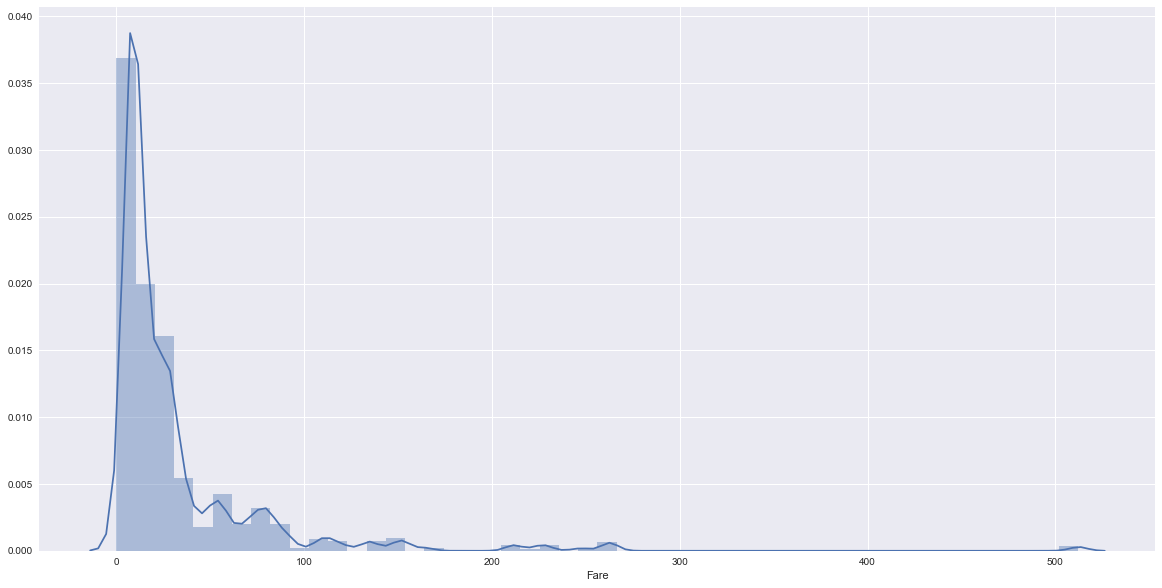

In [132]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(df[(df['Fare'].notnull())]['Fare']);

In [102]:
df['honorific'] = df['Name'].str.extract(', (\D+?)\.')

In [121]:
pd.concat([df['Survived'], pd.get_dummies(df['honorific']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
Capt,-0.026456
Col,0.011329
Don,-0.026456
Dr,0.008185
Jonkheer,-0.026456
Lady,0.042470
Major,0.011329
Master,0.085221
Miss,0.327093


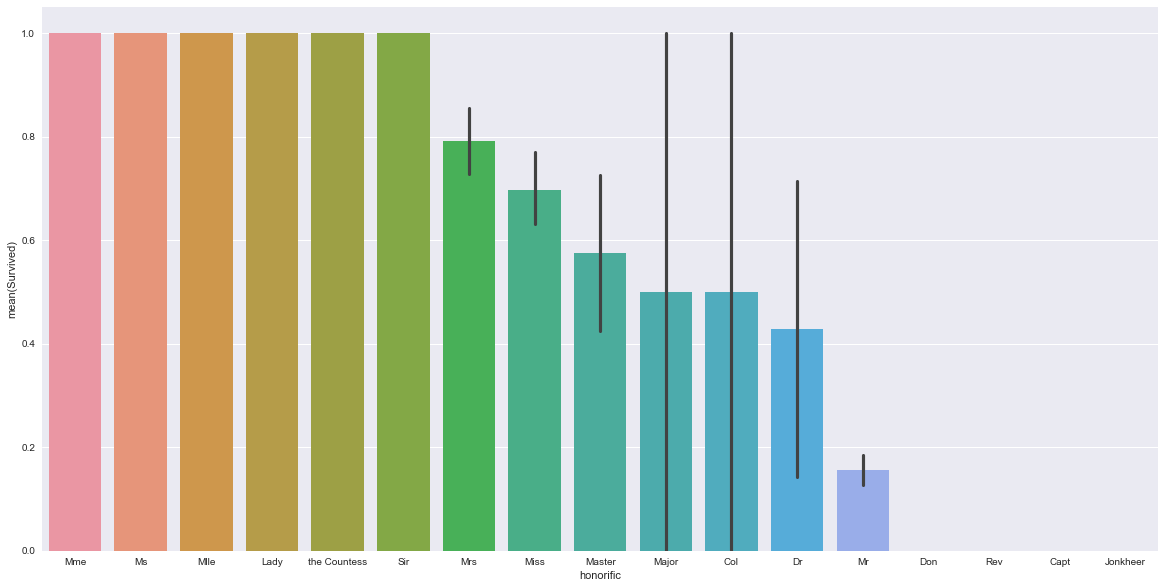

In [131]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="honorific", y="Survived", data=df, order=['Mme', 'Ms', 'Mlle', 'Lady', 'the Countess', 'Sir', 'Mrs', 'Miss', 'Master', 'Major', 'Col', 'Dr', 'Mr', 'Don', 'Rev', 'Capt', 'Jonkheer']);